# 다중분류_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2.데이터 살펴보기

5


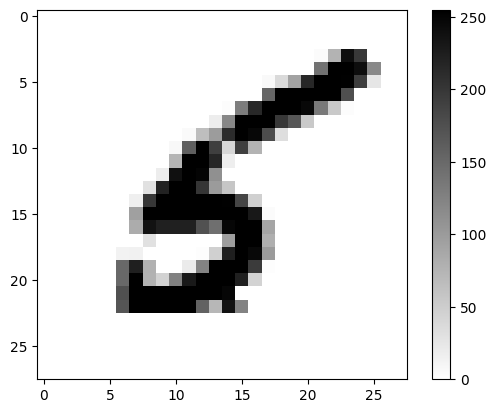

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 12229

print(y_train[n])
plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [7]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   4,  75, 241, 198,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 140, 254, 254, 242, 118,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6,  37,  93, 216, 254, 254, 253, 194,  25,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 153, 254, 254, 254, 254, 254, 176,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3, 130, 214, 254, 254, 254, 246, 134,  54,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         18, 120, 254, 254, 254, 199, 168,  54,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  65,
         99, 212, 254, 248, 179,  33,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7, 160, 254,
        192,  40, 192,  75,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  74, 255, 254,
        217,  17,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 239, 254, 251,
        111,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30, 220, 254, 254, 202,
        100,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  16, 200, 254, 254, 254, 254,
        254, 253, 186,  47,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  95, 254, 254, 254, 254, 254,
        254, 254, 254, 230,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  83, 236, 223, 223, 223, 174,
        144, 249, 254, 254,  90,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,   0,   0,   0,   0,
          0,  97, 254, 254,  80,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  13,  14,   0,   0,   0,   0,   2,
         47, 224, 254, 246, 100,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 151, 224,  78,   0,   0,  20, 123,
        254, 254, 254, 196,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 151, 254,  77,  45, 126, 229, 254,
        254, 254, 223,  43,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 175, 254, 254, 254, 254, 254, 254,
        254, 249,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 170, 254, 254, 254, 254, 255, 156,
         72, 237, 124,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

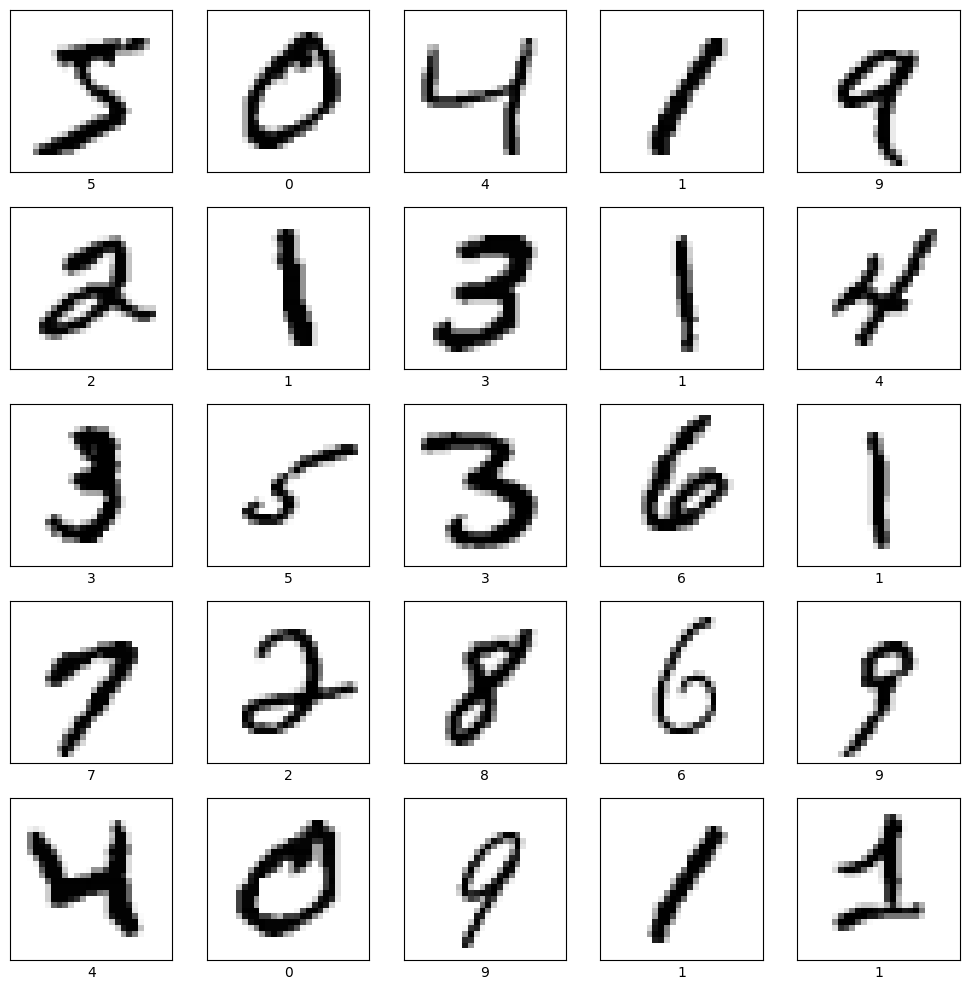

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [9]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [11]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [12]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [13]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [14]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.모델링

In [15]:
nfeatures = x_train.shape[1]
nfeatures

784

In [16]:
clear_session()

model = Sequential([Input(shape = (nfeatures,)),
                    Dense(10, activation = 'softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7901 - val_loss: 0.3211
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3268 - val_loss: 0.2879
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2940 - val_loss: 0.2796
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2819 - val_loss: 0.2702
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2668 - val_loss: 0.2676
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2647 - val_loss: 0.2661
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2638 - val_loss: 0.2647
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2599 - val_loss: 0.2623
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2640 - val_loss: 0.2672
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2602 - val_loss: 0.2607
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2522 - val_loss: 0.2631
Epoch 12/20
1500/1500 ━━━━━━━━

* 학습결과 그래프

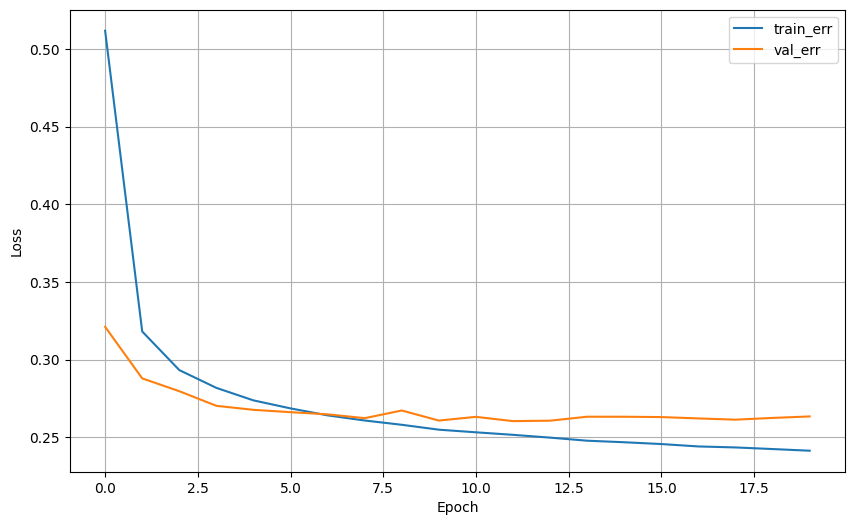

In [18]:
dl_history_plot(history)

* 예측 및 평가

In [19]:
pred = model.predict(x_val)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.5218524e-08, 8.7137606e-14, 2.0405048e-07, 4.9767899e-03,
        8.5962348e-08, 1.2646461e-05, 4.2283419e-15, 9.9482095e-01,
        4.7822214e-06, 1.8447432e-04],
       [4.6772297e-05, 1.1276079e-05, 9.9591053e-01, 5.1303100e-06,
        1.5512998e-16, 4.2524526e-04, 3.5814964e-03, 6.8309439e-21,
        1.9543464e-05, 2.4797620e-18],
       [5.6376808e-07, 9.8892796e-01, 6.4803478e-03, 1.3842003e-03,
        6.8948539e-05, 5.2235142e-04, 4.5441426e-04, 7.5522068e-05,
        1.9789480e-03, 1.0653142e-04],
       [9.9992716e-01, 4.1717849e-12, 1.4665750e-05, 1.4841818e-06,
        1.1214896e-08, 1.6628808e-05, 2.9567769e-05, 6.3892844e-06,
        2.2760935e-06, 1.8245426e-06],
       [5.1787711e-04, 5.8929476e-08, 1.4913924e-03, 1.8023513e-05,
        9.6711195e-01, 5.9584985e-05, 9.2751795e-04, 3.9321110e-03,
        3.0536910e-03, 2.2887820e-02]], dtype=float32)

In [20]:
pred_1 = pred.argmax(axis=1)
pred_1[:5]

array([7, 2, 1, 0, 4])

In [21]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1, digits = 4))

[[ 964    0    1    2    0    6    4    2    1    0]
 [   0 1116    3    3    0    1    3    2    7    0]
 [   7   13  911   22    6    5   13   11   41    3]
 [   3    0   12  933    0   24    2   12   20    4]
 [   1    1    6    3  915    0    8    8   10   30]
 [   9    2    1   31    6  788   13    9   29    4]
 [  13    3    8    3    7   14  907    1    2    0]
 [   1    7   17   11    6    1    0  963    2   20]
 [   8    9    5   29    7   29    7   13  863    4]
 [  11    7    1   11   21    7    0   37    7  907]]
              precision    recall  f1-score   support

           0     0.9479    0.9837    0.9654       980
           1     0.9637    0.9833    0.9734      1135
           2     0.9440    0.8828    0.9124      1032
           3     0.8903    0.9238    0.9067      1010
           4     0.9452    0.9318    0.9385       982
           5     0.9006    0.8834    0.8919       892
           6     0.9478    0.9468    0.9473       958
           7     0.9102    0.9368   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [22]:
model2 = Sequential([Input(shape = (nfeatures,)),
                    Dense(128, activation='relu'),
                    Dense(10, activation = 'softmax')])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy')

In [29]:
hist = model2.fit(x_train, y_train, epochs = 15, validation_split=.2).history

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0124 - val_loss: 0.1004
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0104 - val_loss: 0.1040
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0073 - val_loss: 0.1012
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0124 - val_loss: 0.1076
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0064 - val_loss: 0.1177
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0055 - val_loss: 0.1217
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0048 - val_loss: 0.1117
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0053 - val_loss: 0.1232
Epoch 9/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0043 - val_loss: 0.1199
Epoch 10/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0070 - val_loss: 0.1218
Epoch 11/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0050 - val_loss: 0.1245
Epoch 12/15
1500/1500 ━━━━━━━━

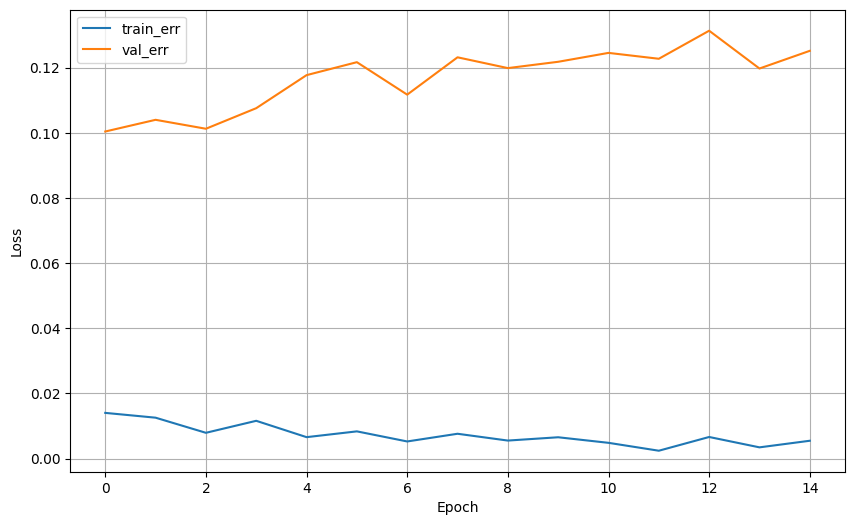

In [30]:
dl_history_plot(hist)

* 예측 및 평가

In [31]:
pred = model2.predict(x_val)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[7.4388396e-13, 4.8941504e-20, 3.0777767e-13, 5.9665695e-09,
        7.2350575e-24, 2.4276951e-18, 3.2070365e-24, 1.0000000e+00,
        1.5601023e-12, 8.1886147e-12],
       [1.7785774e-14, 3.9645347e-14, 1.0000000e+00, 6.5531119e-15,
        3.7276389e-26, 2.5432641e-16, 1.2040812e-11, 2.2992118e-28,
        1.6683017e-12, 2.1655333e-23],
       [1.6554313e-10, 9.9999642e-01, 1.3392612e-06, 2.1023991e-10,
        3.0141553e-07, 6.6230604e-13, 2.4147853e-09, 3.6291905e-07,
        1.5962090e-06, 3.0309776e-11],
       [1.0000000e+00, 1.9092505e-20, 3.8179468e-10, 1.8725222e-20,
        2.4055844e-14, 1.0850054e-15, 9.1002217e-13, 1.0609343e-09,
        1.5752699e-21, 5.1158856e-12],
       [7.9599016e-16, 9.4323349e-24, 1.3752899e-15, 2.3259687e-20,
        1.0000000e+00, 1.4208088e-16, 6.3260980e-17, 2.4759967e-11,
        3.1743933e-16, 3.7698587e-08]], dtype=float32)

In [32]:
pred_1 = pred.argmax(axis=1)
pred_1[:5]

array([7, 2, 1, 0, 4])

In [33]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1, digits = 4))

[[ 965    0    2    2    0    3    3    1    3    1]
 [   0 1125    4    1    0    0    2    1    2    0]
 [   6    1 1006    3    1    1    2    7    5    0]
 [   1    0    4  995    1    3    0    3    3    0]
 [   0    0    4    1  964    0    4    1    0    8]
 [   0    0    0   12    0  869    5    2    3    1]
 [   2    2    1    1    7    6  939    0    0    0]
 [   1    6    8    3    0    0    0  999    1   10]
 [   5    0    4    8    4    4    4    6  934    5]
 [   1    2    0    7    9    3    1    5    0  981]]
              precision    recall  f1-score   support

           0     0.9837    0.9847    0.9842       980
           1     0.9903    0.9912    0.9908      1135
           2     0.9739    0.9748    0.9743      1032
           3     0.9632    0.9851    0.9741      1010
           4     0.9777    0.9817    0.9797       982
           5     0.9775    0.9742    0.9759       892
           6     0.9781    0.9802    0.9791       958
           7     0.9746    0.9718   

### (2) 모델2

In [34]:
model3 = Sequential([Input(shape = (nfeatures,)),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(10, activation = 'softmax')])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model3.compile(optimizer=Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy')

In [37]:
hist = model3.fit(x_train, y_train, epochs = 15, validation_split=.2).history

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3991 - val_loss: 0.1304
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0977 - val_loss: 0.0986
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0593 - val_loss: 0.1018
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0406 - val_loss: 0.0867
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0330 - val_loss: 0.1023
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0282 - val_loss: 0.1050
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0201 - val_loss: 0.1094
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0182 - val_loss: 0.0987
Epoch 9/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0126 - val_loss: 0.1207
Epoch 10/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0175 - val_loss: 0.1144
Epoch 11/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0113 - val_loss: 0.1285
Epoch 12/15
1500/1500 ━━━━━━━━

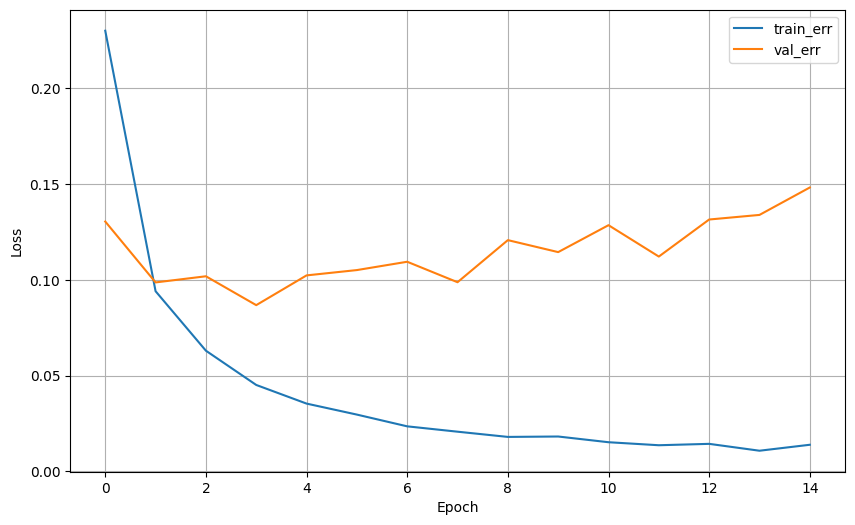

In [38]:
dl_history_plot(hist)

In [39]:
pred = model3.predict(x_val)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.89749691e-11, 8.03717787e-11, 2.13678068e-11, 5.57017709e-14,
        1.03956866e-17, 1.19712193e-15, 5.85565421e-20, 1.00000000e+00,
        2.46578033e-14, 1.91839235e-11],
       [8.76800657e-20, 1.00805174e-13, 1.00000000e+00, 2.26817911e-15,
        1.07161952e-24, 1.97788776e-23, 2.35649236e-22, 8.93393747e-23,
        4.48157977e-18, 6.43997695e-32],
       [5.65601038e-11, 9.99997377e-01, 2.00550176e-06, 2.50892493e-15,
        5.50620001e-11, 9.88842580e-13, 1.16505194e-09, 3.15971924e-08,
        5.81291829e-07, 1.14111906e-14],
       [1.00000000e+00, 4.18504553e-17, 3.69857664e-17, 1.57701953e-21,
        1.99050184e-19, 4.11446599e-22, 2.27077182e-19, 3.00463148e-15,
        1.20076267e-22, 4.23476273e-18],
       [4.86115664e-14, 1.13611826e-14, 2.21025942e-15, 5.19274412e-23,
        1.00000000e+00, 7.76817204e-20, 4.08320703e-16, 7.06160269e-11,
        2.68781376e-14, 3.23360616e-10]], dtype=float32)

In [40]:
pred_1 = pred.argmax(axis=1)
pred_1[:5]

array([7, 2, 1, 0, 4])

In [41]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1, digits = 4))

[[ 972    1    1    0    1    0    3    1    1    0]
 [   0 1117    5    1    0    1    3    1    7    0]
 [   7    0 1014    1    0    0    3    5    2    0]
 [   1    0   11  979    0    6    0    7    5    1]
 [   3    0    1    0  946    0    7    1    3   21]
 [   4    0    0   11    1  871    3    0    2    0]
 [   9    2    0    1    4    2  938    0    2    0]
 [   1    2   11    2    2    0    0 1003    3    4]
 [   9    0    8    5    1    2    3    5  939    2]
 [   5    2    1    3    6    7    1    7    4  973]]
              precision    recall  f1-score   support

           0     0.9614    0.9918    0.9764       980
           1     0.9938    0.9841    0.9889      1135
           2     0.9639    0.9826    0.9731      1032
           3     0.9761    0.9693    0.9727      1010
           4     0.9844    0.9633    0.9738       982
           5     0.9798    0.9765    0.9781       892
           6     0.9761    0.9791    0.9776       958
           7     0.9738    0.9757   